## Drug Consumption and individual characteristics

In this notebook, I will show the correlation between drug consumption and multiple features about individuals such as the country, the age, the education level etc ...

It helps answer questions like:

- Does the age of an individual influence his drug consumption?
-  Does the impulsive behavior of an individual influence his drug consumption?
  
/!\ Disclaimer, the dataset is not representative of the general population, it is a survey of 1885 individuals. See [`notebooks/README.md`](../README.md) for more information.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../csv_parser/drug_consumption_cleaned.csv')
pd.set_option('future.no_silent_downcasting', True)

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [3]:
features = list(df.columns[1:13])
drugs = list(df.columns[13:])

In [4]:
# We need to replace df with numeric values to be able to compute correlations

age_col = {
    '18-24': -0.95197,
    '25 - 34': -0.07854,
    '35 - 44': 0.49788,
    '45 - 54': 1.09449,
    '55 - 64': 1.82213,
    '65+': 2.59171
}
df['Age'] = df['Age'].replace(age_col)

gender_col = {
            'Female': 0.48246,
            'Male': -0.48246
            }
df['Gender'] = df['Gender'].replace(gender_col)

education_col = {
            'Left School Before 16 years': -2.43591,
            'Left School at 16 years': -1.73790,
            'Left School at 17 years': -1.43719,
            'Left School at 18 years': -1.22751,
            'Some College,No Certificate Or Degree': -0.61113,
            'Professional Certificate/ Diploma': -0.05921,
            'University Degree': 0.45468,
            'Masters Degree': 1.16365,
            "Doctorate Degree": 1.98437
}

df['Education'] = df['Education'].replace(education_col)

country_col = {
    'Australia': -0.09765,
    'Canada': 0.24923,
    'New Zealand': -0.46841,
    'Other': -0.28519,
    'Republic of Ireland': 0.21128,
    'UK': 0.96082,
    'USA': -0.57009
}

df['Country'] = df['Country'].replace(country_col)

ethnicity_col = {
    "Asian": -0.50212,
    "Black": -1.10702,
    "Mixed-Black/Asian": 1.90725,
    "Mixed-White/Asian": 0.12600,
    "Mixed-White/Black": -0.22166,
    "Other": 0.11440,
    "White": -0.31685
}

df['Ethnicity'] = df['Ethnicity'].replace(ethnicity_col)

usage_col = {
    "Never Used": 0,
    "Used over a Decade Ago": 1,
    "Used in Last Decade": 2,
    "Used in Last Year": 3,
    "Used in Last Month": 4,
    "Used in Last Week": 5,
    "Used in Last Day": 6
}

df[drugs] = df[drugs].replace(usage_col)

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


In [5]:
# We start by observing the highest correlations between each drug and the features
correlations = []
for drug in drugs:
    for feature in features:
        correlations.append((drug, feature, df[drug].corr(df[feature])))

# We sort the list to have the highest correlations first
correlations = sorted(correlations, key=lambda x: x[2], reverse=True)

# We can witness that the 30 highest correlations are not about age, country or ethnicity, but only about characteristics of the person
# As expected, the main characteristic is the Sensation Seeking, which leads to a higher consumption of drugs
# As sell as the openness to experience, which is also a factor of drug consumption
print(*correlations[:30], sep='\n')

('Cannabis', 'SS', 0.45613655450406493)
('Cannabis', 'Oscore', 0.41416262189358455)
('Legalh', 'SS', 0.4055778552531838)
('Ecstasy', 'SS', 0.38818619655992304)
('Mushrooms', 'SS', 0.3782853777625287)
('LSD', 'Oscore', 0.36975911051910304)
('Mushrooms', 'Oscore', 0.36913941481128937)
('LSD', 'SS', 0.36553577743377336)
('Coke', 'SS', 0.3433520664032049)
('Amphet', 'SS', 0.33110522351156163)
('Legalh', 'Oscore', 0.31732226610206776)
('Cannabis', 'Impulsive', 0.3105287456498304)
('Nicotine', 'SS', 0.3056345911961203)
('Ecstasy', 'Oscore', 0.2963057088389688)
('Amphet', 'Impulsive', 0.2894381837447692)
('Benzos', 'Nscore', 0.27222065600294526)
('Legalh', 'Impulsive', 0.2675787698375155)
('Mushrooms', 'Impulsive', 0.26368389461899877)
('Ecstasy', 'Impulsive', 0.2608640467105362)
('Coke', 'Impulsive', 0.2600421406491375)
('VSA', 'SS', 0.2505994275761305)
('Benzos', 'SS', 0.24790332216013594)
('Nicotine', 'Impulsive', 0.24629876239706203)
('Ketamine', 'SS', 0.24360859994078948)
('LSD', 'Impuls

In [17]:
# We can also create correlation groups depending on each feature, and order the groups depending on the average correlation
# A group for the age correlations, another for the country etc...
from itertools import groupby
from statistics import mean

correlations.sort(key=lambda x: x[1])

grouped_data = {}

# We group data by the second element of the tuple (feature)
for key, group in groupby(correlations, key=lambda x: x[1]):
    data = list(group)
    grouped_data[key] = {
        "mean": mean([x[2] for x in data]),
        "correlations": data
        }

# Then we sort the entries depending on the mean of each group
sorted_grouped_data = sorted(grouped_data.items(), key=lambda x: x[1]['mean'], reverse=True)

final_data = {feature: data['mean'] for feature, data in sorted_grouped_data}

for key, value in final_data.items():
    print(key, "-->", value)

{'SS': 0.24750768760730996,
 'Impulsive': 0.1835408142616583,
 'Oscore': 0.18211357240362108,
 'Nscore': 0.09115772430291505,
 'Ethnicity': 0.07279538563388822,
 'Escore': -0.005960554225981149,
 'Ascore': -0.10339419036206977,
 'Education': -0.11093035147121946,
 'Cscore': -0.1526333011851522,
 'Gender': -0.15812904754418552,
 'Age': -0.1923893011427491,
 'Country': -0.25053952952862485}

### Once again, the highest mean correlation is witnessed about the Sensation Seeking

### Now let's plot the means of drug consumption for each group, so we can visualize it in a better way.

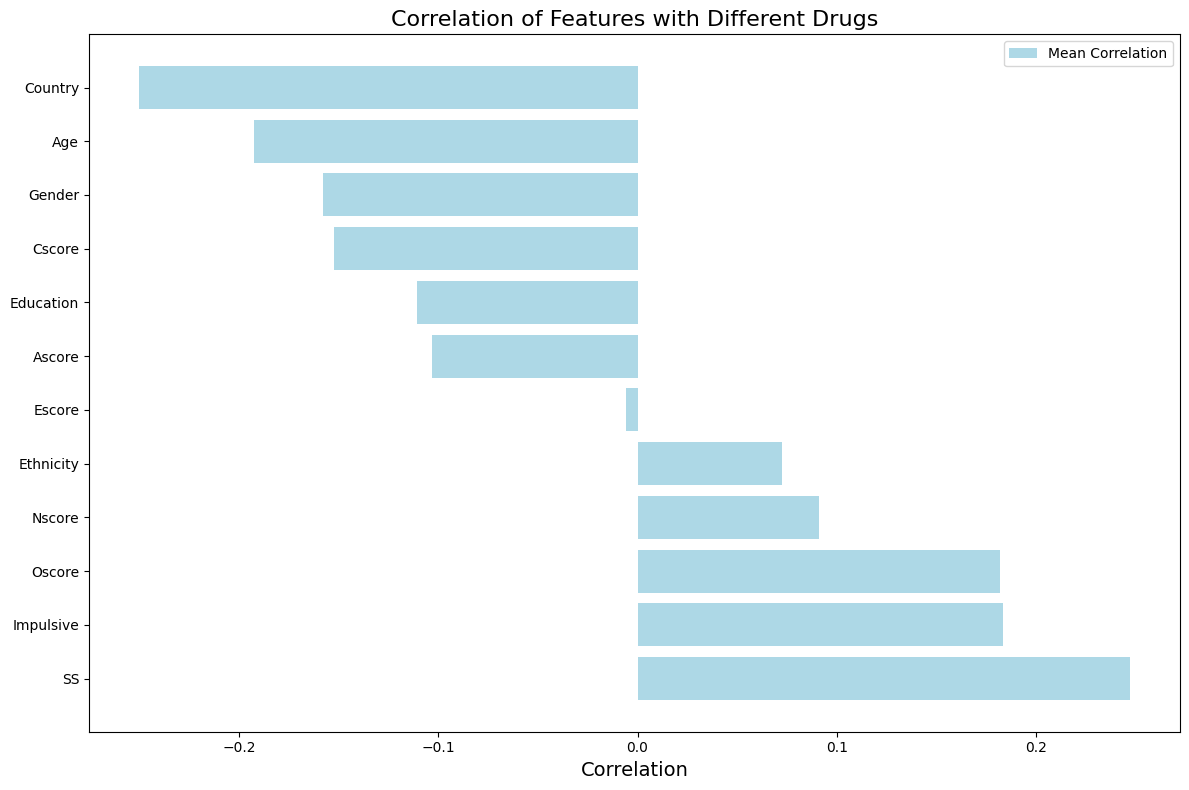

In [16]:
# Extract features and their means and correlations
features = [item for item in final_data]
means = [item[1] for item in final_data.items()]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot mean correlations
ax.barh(features, means, color='lightblue', label='Mean Correlation')

# Customize plot
ax.set_xlabel('Correlation', fontsize=14)
ax.set_title('Correlation of Features with Different Drugs', fontsize=16)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### We can witness that the highest correlation is about the Sensation Seeking, and the lowest is about the country.
- The highest mean of correlation is for the Sensation Seeking, followed by the Impulsiveness
- It could mean that these characteristics are the most important to predict the consumption of drugs